In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/shubh0799/churn-modelling

# SS

In [14]:
df = pd.read_csv("Churn_Modelling.csv")

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [15]:
df.shape

(10000, 14)

In [16]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [18]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [19]:
df[['Geography','Gender']].describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [20]:
cor_matrix=df.corr().round(decimals=1)
cor_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
Age,-0.0,1.0,-0.0,0.0,-0.0,-0.0,0.1,-0.0,0.3
Tenure,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
Balance,0.0,0.0,-0.0,1.0,-0.3,-0.0,-0.0,0.0,0.1
NumOfProducts,0.0,-0.0,0.0,-0.3,1.0,0.0,0.0,0.0,-0.0
HasCrCard,-0.0,-0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0
IsActiveMember,0.0,0.1,-0.0,-0.0,0.0,-0.0,1.0,-0.0,-0.2
EstimatedSalary,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,1.0,0.0
Exited,-0.0,0.3,-0.0,0.1,-0.0,-0.0,-0.2,0.0,1.0


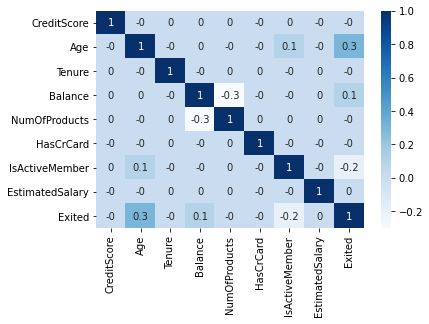

In [21]:
sns.heatmap(cor_matrix, annot = True, cmap='Blues')

# EDA

**Numerical: CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary**

**Categorical: HasCrCard, IsActiveMember, Gender, Geography**


## Continuous

### Histogram

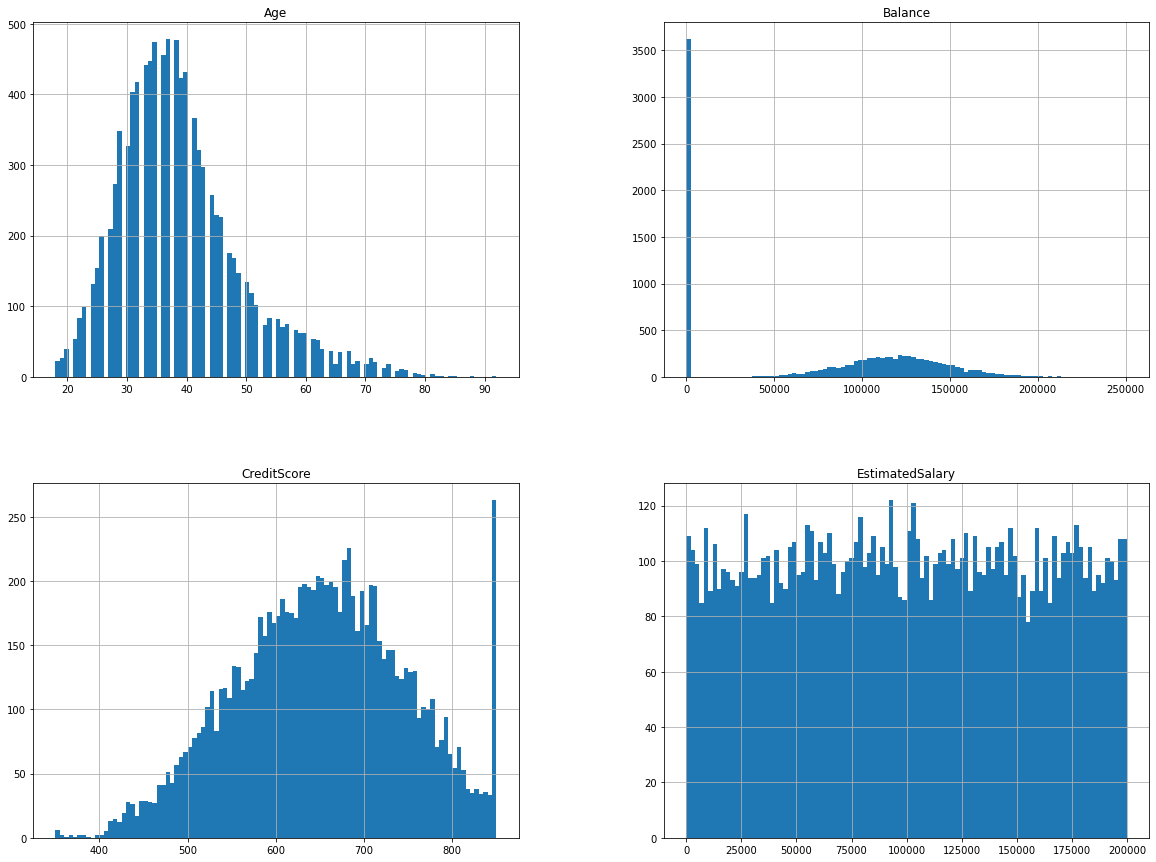

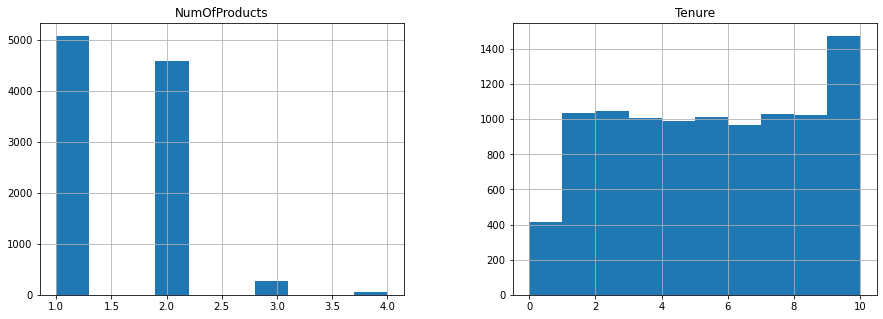

In [22]:
df.hist(column = ['CreditScore','Age','Balance','EstimatedSalary'],bins=100, figsize=(20, 15))
df.hist(column = ['Tenure','NumOfProducts'], figsize = (15,5))
plt.show()

### Boxplot

CreditScore           AxesSubplot(0.125,0.657941;0.352273x0.222059)
Age                AxesSubplot(0.547727,0.657941;0.352273x0.222059)
Balance               AxesSubplot(0.125,0.391471;0.352273x0.222059)
EstimatedSalary    AxesSubplot(0.547727,0.391471;0.352273x0.222059)
Tenure                   AxesSubplot(0.125,0.125;0.352273x0.222059)
NumOfProducts         AxesSubplot(0.547727,0.125;0.352273x0.222059)
dtype: object

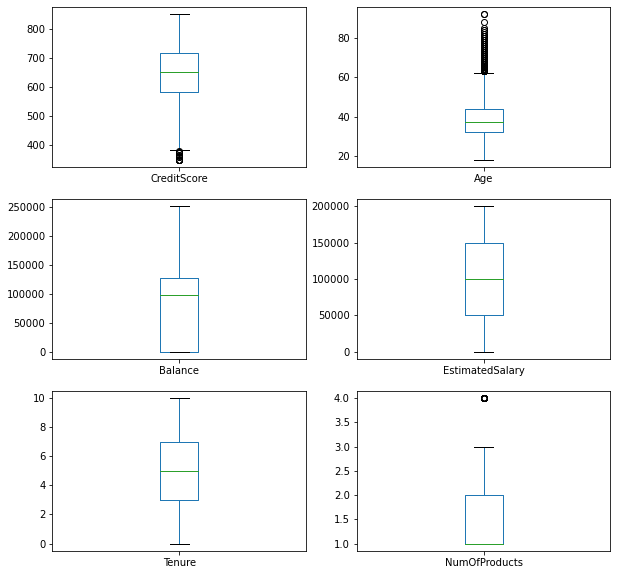

In [23]:
df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary','Tenure','NumOfProducts']].plot.box(subplots = True, layout=(3,2), figsize=(10, 10))

## Categorical

### Bar chart

In [25]:
# HasCrCard, IsActiveMember, Gender, Geography

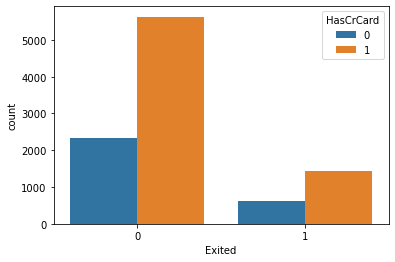

In [26]:
sns.countplot(x='Exited', hue='HasCrCard', data=df)

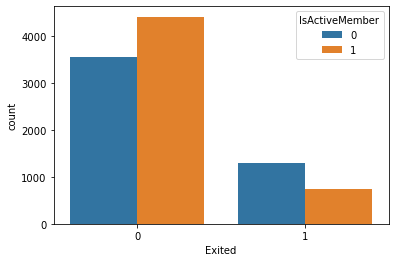

In [27]:
sns.countplot(x='Exited', hue='IsActiveMember', data=df)

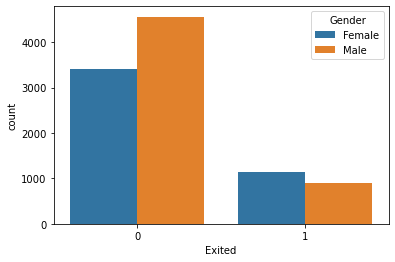

In [28]:
sns.countplot(x='Exited', hue='Gender', data=df)

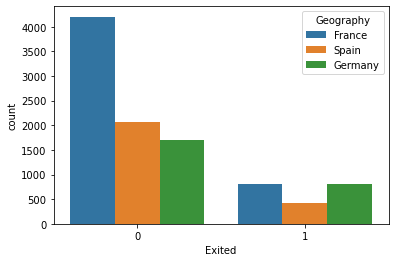

In [29]:
sns.countplot(x='Exited', hue='Geography', data=df)

In [30]:
df.groupby('Exited').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


# Data Cleaning and Preparation

## Data Cleaning

### Gender

In [31]:
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)

df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0


### Geography

In [32]:
country_dummies = pd.get_dummies(df['Geography'])

country_dummies.head(10)

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,1,0
8,1,0,0
9,1,0,0


In [33]:
df = pd.DataFrame.join(df, country_dummies)

df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0,1,0,0


### Drop ...

In [34]:
df.drop(['Geography', 'Spain'], axis=1, inplace=True)

df.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0,0
6,822,1,50,7,0.00,2,1,1,10062.80,0,1,0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0,1
8,501,1,44,4,142051.07,2,0,1,74940.50,0,1,0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,1,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int32  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  France           10000 non-null  uint8  
 11  Germany          10000 non-null  uint8  
dtypes: float64(2), int32(1), int64(7), uint8(2)
memory usage: 761.8 KB


**Number ...**

## Preparation

In [36]:
from scipy import stats

In [37]:
for i in df.columns:
    print(i, ':', len(df[np.abs(stats.zscore(df[i])) > 3][i]))

CreditScore : 8
Gender : 0
Age : 133
Tenure : 0
Balance : 0
NumOfProducts : 60
HasCrCard : 0
IsActiveMember : 0
EstimatedSalary : 0
Exited : 0
France : 0
Germany : 0


=> 201 outliers

CreditScore         AxesSubplot(0.125,0.125;0.227941x0.755)
Age              AxesSubplot(0.398529,0.125;0.227941x0.755)
NumOfProducts    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

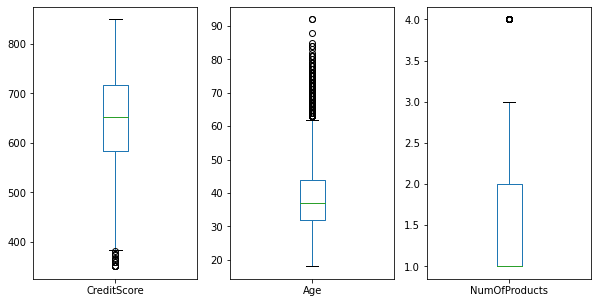

In [38]:
df[['CreditScore', 'Age','NumOfProducts']].plot.box(subplots = True, layout=(1,3), figsize=(10, 5))

In [39]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


**201 rows has been deleted**

reindex

In [40]:
index=pd.Index([i for i in range(9799)])

df.index = index

df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9794,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9795,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9796,709,0,36,7,0.00,1,0,1,42085.58,1,1,0
9797,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


# Fit models

### 1) Splitting the dataset into training set and test set with ratio 0.75 : 0.25 respectively###

In [41]:
from sklearn.model_selection import train_test_split
X = df.drop('Exited',axis = 1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

### 2) Building and testing models ###

To avoid overfitting, we use 10 fold cross validation to estimate accuracy. This will split the dataset into 10 parts, in which 9 parts for training and the remaining one for testing. 

We use the metric of 'accuracy' to evaluate models. This is a ratio of the number of correctly predicted instances divide by the total number of instances in the dataset multiplied by 100 to get an accuracy percentage.

In [42]:
# Import all the functions and objects we want to test
from sklearn import model_selection
from sklearn.metrics import classification_report # Reporting metric
from sklearn.metrics import confusion_matrix # classifies predicted values as TP, TN, FP, FN
from sklearn.metrics import accuracy_score # calculates accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [43]:
# Evaluate each model in turn
results=[]
names=[]
seed=7

models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('CARD',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

C:\Users\ngong\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LR:0.794666(0.017161)


C:\Users\ngong\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


CARD:0.785958(0.016542)


C:\Users\ngong\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN:0.766501(0.016740)


C:\Users\ngong\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LDA:0.821609(0.016795)
NB:0.794803(0.018506)


C:\Users\ngong\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\ngong\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVM:0.798477(0.018555)


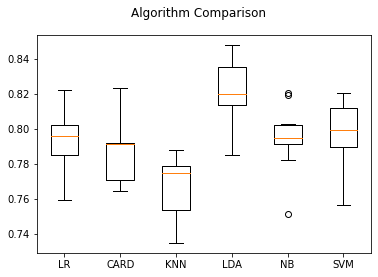

In [44]:
# Compare accuracy using boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It looks like that using this comparison method, all the models have accuracy score above 76%, which is very high. 

**Howewer, this high accuracy is of no use.** 

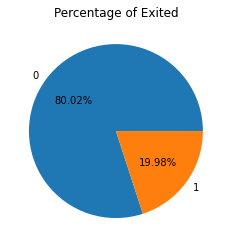

In [45]:
plt.pie(df['Exited'].value_counts(), autopct = '%1.2f%%', labels=[0, 1])
plt.title('Percentage of Exited')
plt.show()

As you can see above, number of customers who exited is approximately 20%, which is 4 times lower than those who do not exited. Hence, the dataset we use has unbalanced classes. That is the reason why the accuracy metric is not of much use here.

### 3) ROC curve for comparision ###

This is a method that can accommodate uncertainty by showing the entire space of performance possibilities. We plot a two-dimensional space of a classifier with false positive rate on the x axis against true positive rate on the y axis.

ROC graph depicts relative trade-offs that a classifier makes between benefits (true positives) and costs (false positives)

In [75]:
# Define x and y axis
x = X_test
y_true = np.array(y_test)

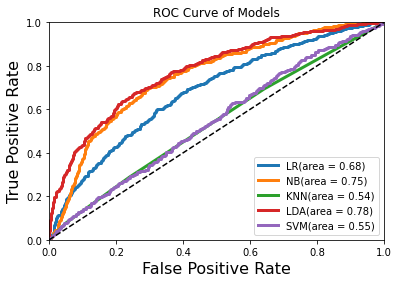

<Figure size 720x432 with 0 Axes>

In [74]:
#import functions
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict

# Logistic Regression
lr = LogisticRegression()
lr.fit(x,y_true)
y_score_lr = cross_val_predict(lr, x, y_true, method='decision_function',cv=10)
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_true,y_score_lr)

# GaussianNB
gnb = GaussianNB()
gnb.fit(x,y_true)
gnb_results = cross_val_score(gnb,x,y_true,scoring='accuracy')
y_score_gnb = cross_val_predict(gnb,x,y_true,method='predict_proba',cv=10)
fpr_gnb, tpr_gnb, threshold_gnb = roc_curve(y_true,y_score_gnb[:,1])

# K Neighbor Classifier
knc = KNeighborsClassifier()
knc.fit(x,y_true)
knc_results = cross_val_score(knc,x,y_true,scoring='accuracy')
y_score_knn = cross_val_predict(knc,x,y_true,method='predict_proba',cv=10)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_true,y_score_knn[:,1])

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(x,y_true)
lda_results = cross_val_score(lda,x,y_true,scoring='accuracy')
y_score_lda = cross_val_predict(lda,x,y_true,method='predict_proba',cv=10)
fpr_lda, tpr_lda, threshold_lda = roc_curve(y_true,y_score_lda[:,1])

# SVC
svc = SVC(probability = True)
svc.fit(x,y_true)
svc_results = cross_val_score(svc,x,y_true,scoring='accuracy')
y_score_svc = cross_val_predict(svc,x,y_true,method='decision_function',cv=10)
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_true,y_score_svc)


# ROC Curve for the models above
plt.plot(fpr_lr, tpr_lr, linewidth = 3, label='LR(area = %0.2f)' % roc_auc_score(y_true,y_score_lr))
plt.plot(fpr_gnb, tpr_gnb, linewidth = 3, label='NB(area = %0.2f)' % roc_auc_score(y_true,y_score_gnb[:,1]))
plt.plot(fpr_knn, tpr_knn, linewidth = 3, label='KNN(area = %0.2f)' % roc_auc_score(y_true,y_score_knn[:,1]))
plt.plot(fpr_lda, tpr_lda, linewidth = 3, label='LDA(area = %0.2f)' % roc_auc_score(y_true,y_score_lda[:,1]))
plt.plot(fpr_svc, tpr_svc, linewidth = 3, label='SVM(area = %0.2f)' % roc_auc_score(y_true,y_score_svc))


plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve of Models')
plt.figure(figsize=(10, 6))
plt.show()

Using AUC, we can sort the models from the best to the poorest in terms of performance as below: 
1. LDA
2. NB
3. LR
4. SVM
5. KNN

### 4) Precision - Recall Curve ###

Similar to ROC curve, Precision-Recall curve is used to evaluate classifier output quality. We plot a two-dimensional space of a classifier with recall rate on the x axis against precision rate on the y axis.

Precision - Recall graph depicts relative trade-offs that a classifier makes between precision and recall.

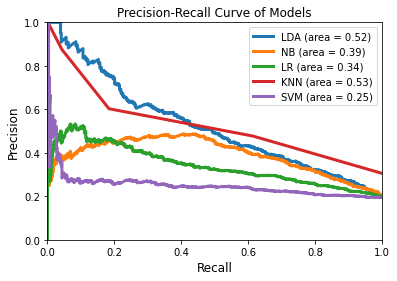

<Figure size 1080x1080 with 0 Axes>

In [76]:
# import functions
from sklearn.metrics import plot_roc_curve, precision_recall_curve, roc_curve, auc, f1_score

#LDA
lda_precision, lda_recall, threshold = precision_recall_curve(y_test, lda.predict_proba(X_test)[:,1])
lda_f1 = f1_score(y_test,lda.predict(X_test))
lda_roc_auc = auc(lda_recall, lda_precision)

#NB
gnb_precision, gnb_recall, threshold = precision_recall_curve(y_test, gnb.predict_proba(X_test)[:,1])
gnb_f1 = f1_score(y_test,gnb.predict(X_test))
gnb_roc_auc = auc(gnb_recall, gnb_precision)

#LR
lr_precision, lr_recall, threshold = precision_recall_curve(y_test, lr.predict_proba(X_test)[:,1])
lr_f1 = f1_score(y_test,lr.predict(X_test))
lr_roc_auc = auc(lr_recall, lr_precision)

#KNN
knc_precision, knc_recall, threshold = precision_recall_curve(y_test, knc.predict_proba(X_test)[:,1])
knc_f1 = f1_score(y_test,knc.predict(X_test))
knc_roc_auc = auc(knc_recall, knc_precision)

#SVC
svc_precision, svc_recall, threshold = precision_recall_curve(y_test, svc.predict_proba(X_test)[:,1])
svc_f1 = f1_score(y_test,svc.predict(X_test))
svc_roc_auc = auc(svc_recall, svc_precision)

# Precision - Recall Curve for the models above
plt.plot(lda_recall, lda_precision, linewidth = 3,label = 'LDA (area = %0.2f)' % lda_roc_auc)
plt.plot(gnb_recall, gnb_precision, linewidth = 3,label = 'NB (area = %0.2f)' % gnb_roc_auc)
plt.plot(lr_recall, lr_precision, linewidth = 3,label = 'LR (area = %0.2f)' % lr_roc_auc)
plt.plot(knc_recall, knc_precision, linewidth = 3,label = 'KNN (area = %0.2f)' % knc_roc_auc)
plt.plot(svc_recall, svc_precision, linewidth = 3,label = 'SVM (area = %0.2f)' % svc_roc_auc)


plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall',fontsize = 12)
plt.ylabel('Precision',fontsize = 12)
plt.title('Precision-Recall Curve of Models')
plt.legend(loc = "upper right")
plt.figure(figsize = (15,15))
plt.show()

Using AUC, we can also sort the models from the best to the poorest in terms of performance as below: 
1. KNN
2. LDA
3. NB
4. LR
5. SVM

### 5) Choosing models ###

From those two graphs above, it can be easily seen that SVM model has the poorest performance (4th and 5th position respectively). Therefore, we will pick the remaining four models to train and make predictions.

# Fit Model

## LDA

In [49]:
ldamodel = LinearDiscriminantAnalysis()
ldamodel.fit(X_train, y_train) #fit training data X and Y to obtain a Logistic regression model 

LinearDiscriminantAnalysis()

In [50]:
print(ldamodel.classes_)
print(ldamodel.intercept_)
pd.DataFrame(ldamodel.coef_.T, X.columns, columns = ['Coeff'])

[0 1]
[-4.09773438]


,Coeff
CreditScore,-4.897031e-04
Gender,-5.779125e-01
Age,9.857703e-02
Tenure,-1.333484e-02
Balance,1.267220e-06
NumOfProducts,-3.836744e-01
HasCrCard,-3.073800e-02
IsActiveMember,-9.880782e-01
EstimatedSalary,5.975045e-07
France,-6.681504e-02


In [51]:
ldamodel.predict_proba(X_test)

array([[0.97891506, 0.02108494],
       [0.91287517, 0.08712483],
       [0.96844528, 0.03155472],
       ...,
       [0.8329088 , 0.1670912 ],
       [0.91259979, 0.08740021],
       [0.51237452, 0.48762548]])

In [52]:
confusion_matrix(y_test, ldamodel.predict(X_test))

array([[1884,   89],
       [ 347,  130]], dtype=int64)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

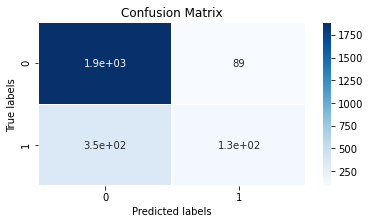

In [53]:
#Linear Discriminant Analysis
cm2=confusion_matrix(y_test,ldamodel.predict(X_test))
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm2, annot=True, ax = ax,linewidths=.5, cmap='Blues') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [54]:
LDAreport = classification_report(y_test, ldamodel.predict(X_test))
print(LDAreport)

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      1973
           1       0.59      0.27      0.37       477

    accuracy                           0.82      2450
   macro avg       0.72      0.61      0.63      2450
weighted avg       0.80      0.82      0.79      2450



# LR

In [55]:
Logisticmodel = LogisticRegression() #create instance of Logistic Regression with penalty=l2 by default
Logisticmodel.fit(X_train, y_train) #fit training data X and Y to obtain a Logistic regression model

LogisticRegression()

In [56]:
print(Logisticmodel.classes_)
print(Logisticmodel.intercept_)
pd.DataFrame(Logisticmodel.coef_.T, X.columns, columns = ['Coeff'])

[0 1]
[-0.00025023]


,Coeff
CreditScore,-0.005581
Gender,-0.001271
Age,0.053135
Tenure,-0.002197
Balance,0.000003
NumOfProducts,-0.001099
HasCrCard,-0.000235
IsActiveMember,-0.001690
EstimatedSalary,-0.000001
France,-0.001013


In [57]:
Logisticmodel.predict_proba(X_test)

array([[0.92855401, 0.07144599],
       [0.80125258, 0.19874742],
       [0.77694812, 0.22305188],
       ...,
       [0.62276663, 0.37723337],
       [0.73360707, 0.26639293],
       [0.70167381, 0.29832619]])

In [58]:
confusion_matrix(y_test, Logisticmodel.predict(X_test))

array([[1920,   53],
       [ 430,   47]], dtype=int64)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

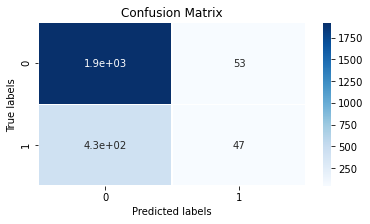

In [59]:
#Logistic Regression
cm1=confusion_matrix(y_test, Logisticmodel.predict(X_test))
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm1, annot=True, ax = ax,linewidths=.5, cmap='Blues') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [60]:
#Classification report
Logisticreport = classification_report(y_test, Logisticmodel.predict(X_test))
print(Logisticreport)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1973
           1       0.47      0.10      0.16       477

    accuracy                           0.80      2450
   macro avg       0.64      0.54      0.53      2450
weighted avg       0.75      0.80      0.75      2450



## NB

In [61]:
NBmodel = GaussianNB()
NBmodel.fit(X_train,y_train)

GaussianNB()

In [62]:
NBmodel.predict_proba(X_test)

array([[0.93612029, 0.06387971],
       [0.89428886, 0.10571114],
       [0.870792  , 0.129208  ],
       ...,
       [0.80411267, 0.19588733],
       [0.9032408 , 0.0967592 ],
       [0.50651063, 0.49348937]])

In [63]:
NBMatrix = confusion_matrix(y_test, NBmodel.predict(X_test))
NBMatrix

array([[1876,   97],
       [ 402,   75]], dtype=int64)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

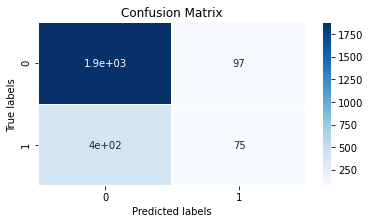

In [64]:
predictions2 = NBmodel.predict(X_test)
cm2 = confusion_matrix(y_test, NBmodel.predict(X_test))
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm2, annot=True, ax = ax,linewidths=.5, cmap='Blues'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [65]:
#Classification report
NBreport = classification_report(y_test, NBmodel.predict(X_test))
print(NBreport)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1973
           1       0.44      0.16      0.23       477

    accuracy                           0.80      2450
   macro avg       0.63      0.55      0.56      2450
weighted avg       0.75      0.80      0.76      2450



# KNN

In [66]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [67]:
#Checking model's performance
knn.predict_proba(X)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       ...,
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [1.        , 0.        ]])

In [68]:
KNNpredict = knn.predict(X_test)
KNNpredict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
#Confusion matrix
KNNmatrix = confusion_matrix(y_test, KNNpredict)
KNNmatrix

array([[1738,  235],
       [ 419,   58]], dtype=int64)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

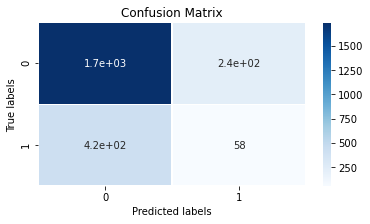

In [70]:
predictions3 = knn.predict(X_test)
cm3 = confusion_matrix(y_test, knn.predict(X_test))
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm3, annot=True, ax = ax,linewidths=.5, cmap='Blues'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [71]:
KNNreport = classification_report(y_test, knn.predict(X_test))
print(KNNreport)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1973
           1       0.20      0.12      0.15       477

    accuracy                           0.73      2450
   macro avg       0.50      0.50      0.50      2450
weighted avg       0.69      0.73      0.71      2450



# Conclusion

In [72]:
      pre     recall
LDA   0.59    0.27
LR    0.47    0.1
NB    0.44    0.16
KNN   0.2     0.12

SyntaxError: invalid syntax (<ipython-input-72-fb77760d13b5>, line 1)

In [ ]:
ROC: LDA, NB, LR, SVM, KNN
P-C: KNN, LDA, NB, LR, SVM

# Additional Information

## Tree

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(X_train, y_train)

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model, feature_names = df.drop('Exited', axis=1).columns, class_names = np.unique(df['Exited']).astype('str'), filled = True)

## Feature Important for LDA

In [ ]:
df1 = pd.DataFrame(ldamodel.coef_.T, X.columns, columns = ['Coeff'])
df1

In [ ]:
## add column of 1's at the beginning of your X_train matrix
X_design = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
print(X_design.shape)

# Initiate matrix of 0's, fill diagonal with each predicted observation's variance
predProbs = ldamodel.predict_proba(X_train)
V = np.diagflat(np.product(predProbs, axis=1))
print(V)

In [ ]:
# Covariance matrix
covLDA = np.linalg.inv(np.dot(np.dot(X_design.T, V), X_design))

In [ ]:
#Calculate sd
parameters_sd = np.sqrt(np.diag(covLDA))
print("Standard errors: ", parameters_sd)

parameters_sd = parameters_sd.reshape(12,1)

In [ ]:
df1['Sd'] = parameters_sd[1:]
df1

In [ ]:
# Wald statistic (coefficient / s.e.) 
logitParams = np.insert(ldamodel.coef_, 0, ldamodel.intercept_)
chi = (logitParams / np.sqrt(np.diag(covLDA))) ** 2
print("Wald statistics: ", chi)

In [ ]:
logitParams

In [ ]:
df1['Chi square'] = chi[1:]

df1

In [ ]:
from scipy import stats
df1['P_value']=(1-stats.chi2.cdf(df1['Chi square'] , 1)).round(4)*2
df1

In [ ]:
X_train1 = X_train[['Gender','Age','NumOfProducts','IsActiveMember','Germany']]
X_test1 = X_test[['Gender','Age','NumOfProducts','IsActiveMember','Germany']]

In [ ]:
LAmodel2 = LinearDiscriminantAnalysis()

In [ ]:
LAmodel2.fit(X_train1,y_train)

In [ ]:
print(LAmodel2.score(X_test1, y_test))

In [ ]:
Logisticmatrix1 = confusion_matrix(y_test, LAmodel2.predict(X_test1))
Logisticmatrix1

In [ ]:
LDAreport1 = classification_report(y_test, LAmodel2.predict(X_test1))
print(LDAreport1)